# ⭐ CapStone Project (Hotel Review) :-

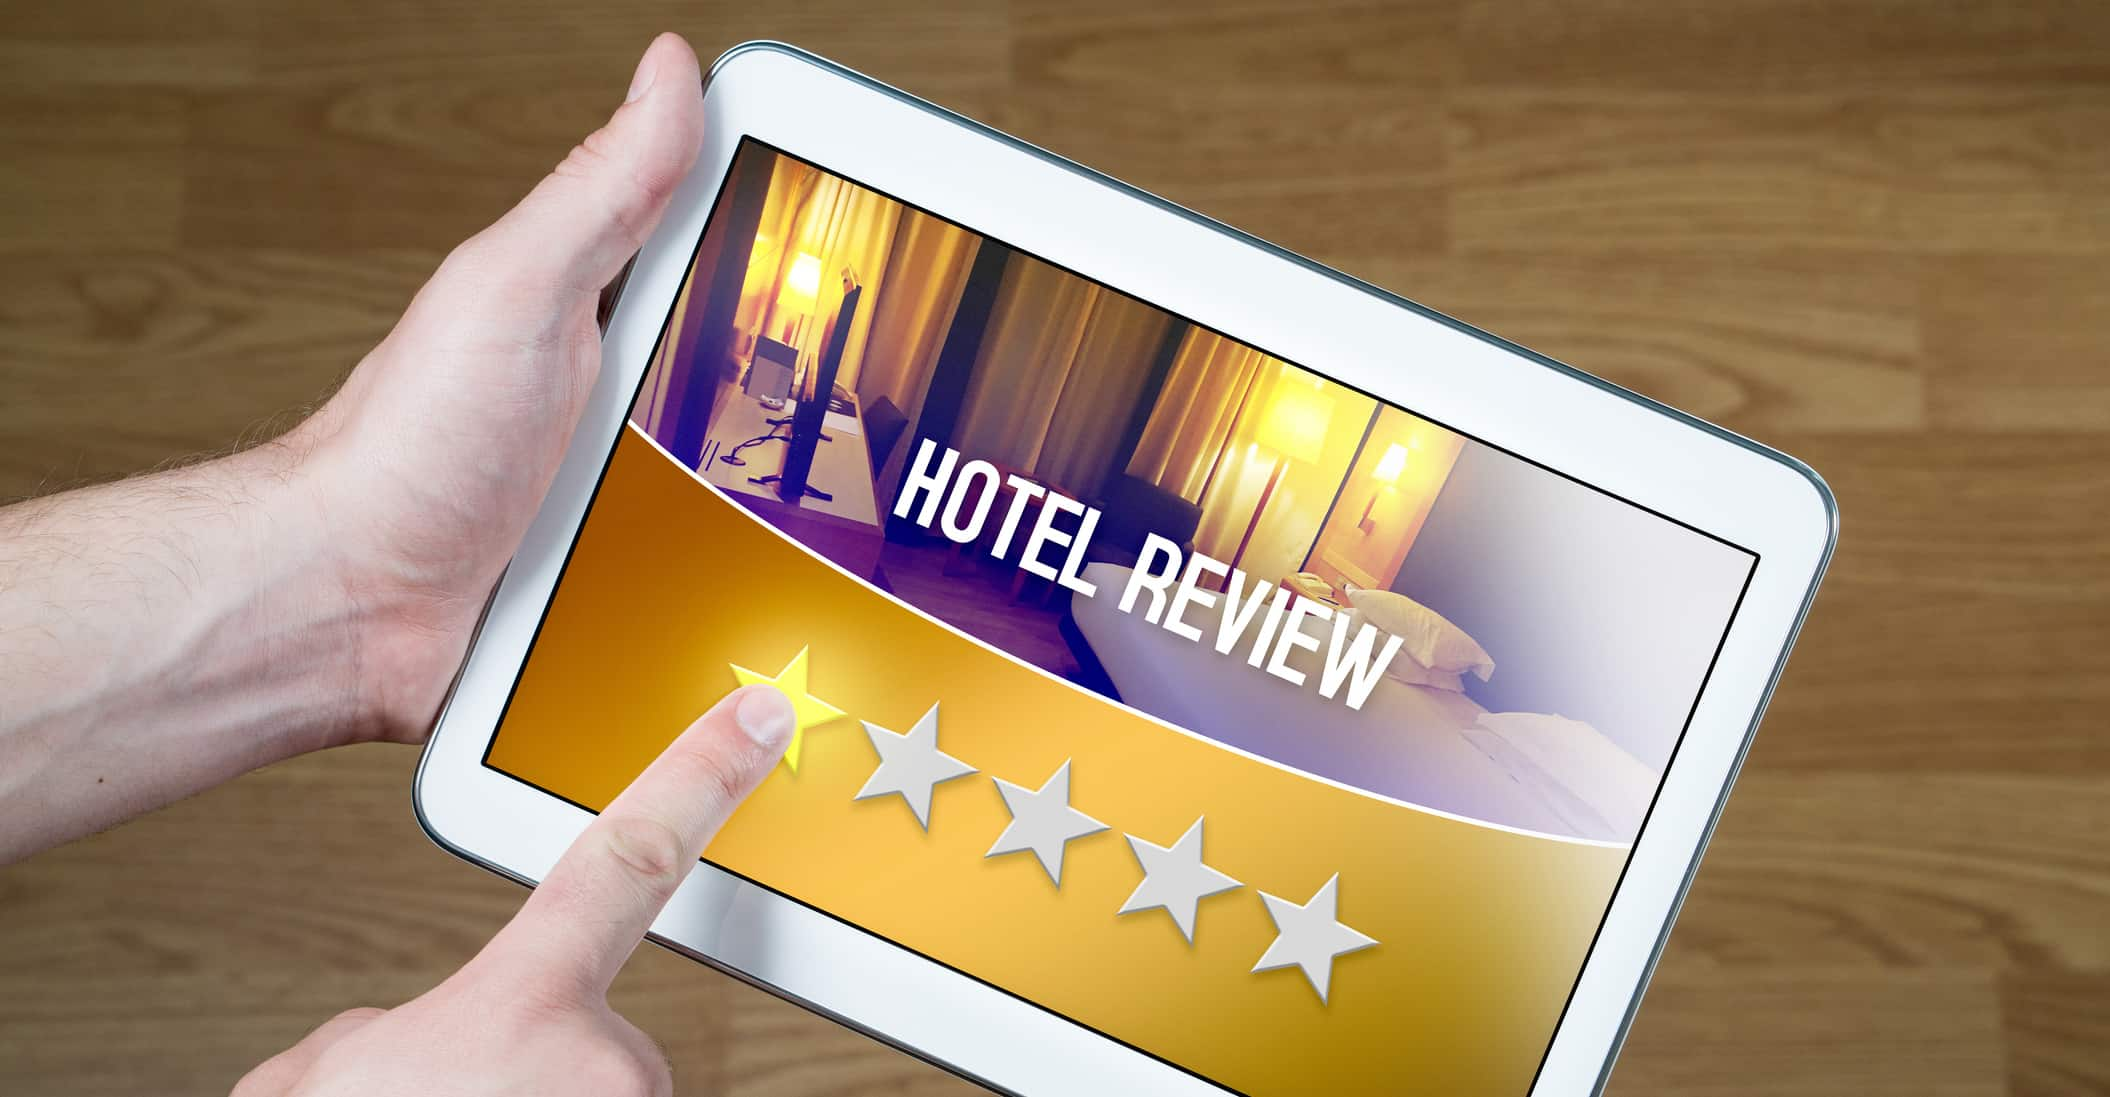

In [4]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Hotel review 2.jpg")

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe

515k-hotel-reviews-data-in-europe.zip: Skipping, found more recently modified local copy (use --force to force download)


## File Unzipping :

In [3]:
import zipfile
file=zipfile.ZipFile('/content/515k-hotel-reviews-data-in-europe.zip','r')
file.extractall('/content')
file.close()

In [4]:
!pip install optimal-data-selector

In [5]:
import optimal_data_selector
from optimal_data_selector.optimal import optimal_data_selector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import sklearn
import math
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import time
import scipy
import re
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df=pd.read_csv('/content/Hotel_Reviews.csv')
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [7]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [8]:
df.shape

(515738, 17)

## All Review : 

In [9]:
df1=df[['Negative_Review','Positive_Review']]
df1

,Negative_Review,Positive_Review
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...
1,No Negative,No real complaints the hotel was great great ...
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...
4,You When I booked with your company on line y...,Amazing location and building Romantic setting
...,...,...
515733,no trolly or staff to help you take the lugga...,location
515734,The hotel looks like 3 but surely not 4,Breakfast was ok and we got earlier check in
515735,The ac was useless It was a hot week in vienn...,No Positive
515736,No Negative,The rooms are enormous and really comfortable...


In [10]:
df1.isnull().sum()

Negative_Review    0
Positive_Review    0
dtype: int64

In [11]:
df2=pd.DataFrame(df1['Negative_Review'])
df2['type']='negative'
df2.index=range(0,len(df1))
df2

,Negative_Review,type
0,I am so angry that i made this post available...,negative
1,No Negative,negative
2,Rooms are nice but for elderly a bit difficul...,negative
3,My room was dirty and I was afraid to walk ba...,negative
4,You When I booked with your company on line y...,negative
...,...,...
515733,no trolly or staff to help you take the lugga...,negative
515734,The hotel looks like 3 but surely not 4,negative
515735,The ac was useless It was a hot week in vienn...,negative
515736,No Negative,negative


In [12]:
lis=[]
for i in range(len(df1),len(df1)+len(df1)):
  lis.append(i)
df3=pd.DataFrame(df1['Positive_Review'])
df3['type']='positive'
df3.index=lis
df3.columns=df2.columns
df3

,Negative_Review,type
515738,Only the park outside of the hotel was beauti...,positive
515739,No real complaints the hotel was great great ...,positive
515740,Location was good and staff were ok It is cut...,positive
515741,Great location in nice surroundings the bar a...,positive
515742,Amazing location and building Romantic setting,positive
...,...,...
1031471,location,positive
1031472,Breakfast was ok and we got earlier check in,positive
1031473,No Positive,positive
1031474,The rooms are enormous and really comfortable...,positive


In [13]:
dff=pd.concat([df2,df3],axis=0)
dff.rename(columns={'Negative_Review':'review'},inplace=True)
dff1=dff.sample(255555,random_state=12)
dff.drop(index=list(dff1.index),axis=0,inplace=True)
dff2=dff.sample(425789,random_state=12)
dff.drop(index=list(dff2.index),axis=0,inplace=True)
dff3=dff.sample(155502,random_state=0)
dff.drop(index=list(dff3.index),axis=0,inplace=True)
final_df=pd.concat([dff1,dff2,dff,dff3],axis=0)
final_df.index=range(0,len(final_df))
final_df[final_df['review']=='No Positive']=np.nan
final_df[final_df['review']=='No Negative']=np.nan
dff4=final_df.copy()
dff4.dropna(axis=0,inplace=True)
dff4.index=range(0,len(dff4))
dff4

,review,type
0,It was a little bit of a travel to the center...,negative
1,nothing,negative
2,Staff,negative
3,Rooftop pool and bar had amazing views over B...,positive
4,NA,negative
...,...,...
867635,The staff were very friendly and were welcomi...,positive
867636,Nothing,negative
867637,Late check in,negative
867638,Everything,positive


## Count Of All Review :

In [14]:
dff4['type'].value_counts()

positive    479792
negative    387848
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

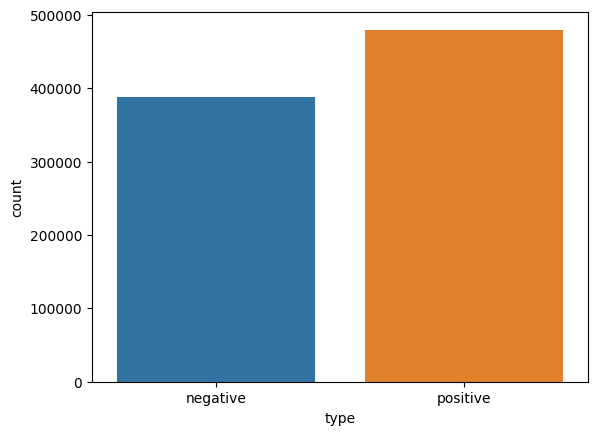

In [15]:
sns.countplot(data=dff4,x=dff4['type'])

## HTML Tags Removiung :

In [16]:
def removing_HTML(text):
  bs=BeautifulSoup(text,'html.parser')
  return bs.get_text()
dff4['review']=dff4['review'].apply(lambda text:removing_HTML(text))
dff4

,review,type
0,It was a little bit of a travel to the center...,negative
1,nothing,negative
2,Staff,negative
3,Rooftop pool and bar had amazing views over B...,positive
4,NA,negative
...,...,...
867635,The staff were very friendly and were welcomi...,positive
867636,Nothing,negative
867637,Late check in,negative
867638,Everything,positive


## Converting to lower case :

In [17]:
dff4['review']=dff4['review'].str.lower()
dff4

,review,type
0,it was a little bit of a travel to the center...,negative
1,nothing,negative
2,staff,negative
3,rooftop pool and bar had amazing views over b...,positive
4,na,negative
...,...,...
867635,the staff were very friendly and were welcomi...,positive
867636,nothing,negative
867637,late check in,negative
867638,everything,positive


## Punctuation Marks Removing :

In [18]:
from string import punctuation
punc=punctuation
punc1=punc.replace("'",'')
def punctuation_m(text):
  return text.translate(str.maketrans('','',punc1))
dff4['review']=dff4['review'].apply(lambda text:punctuation_m(text))
dff4

,review,type
0,it was a little bit of a travel to the center...,negative
1,nothing,negative
2,staff,negative
3,rooftop pool and bar had amazing views over b...,positive
4,na,negative
...,...,...
867635,the staff were very friendly and were welcomi...,positive
867636,nothing,negative
867637,late check in,negative
867638,everything,positive


## Sepcial Characters Removing :

In [19]:
def sp_chr(text):
  text=re.sub('http\s+\s',' ',text)
  text=re.sub('#\s+',' ',text)
  text=re.sub('@\s+',' ',text)
  text=re.sub(r'[^\x00-\x7f]', ' ',text)
  text=re.sub('\s+',' ',text)
  return text
dff4['review']=dff4['review'].apply(lambda text:sp_chr(text))
dff4

,review,type
0,it was a little bit of a travel to the center...,negative
1,nothing,negative
2,staff,negative
3,rooftop pool and bar had amazing views over b...,positive
4,na,negative
...,...,...
867635,the staff were very friendly and were welcomi...,positive
867636,nothing,negative
867637,late check in,negative
867638,everything,positive


## Most Frequent Words :

In [20]:
from collections import Counter
con=Counter()
con1=Counter()
neg=dff4.loc[dff4['type']=='negative']
pos=dff4.loc[dff4['type']=='positive']

## Most frequent wods in positive reviews :

In [21]:
for text in pos['review'].values:
  for word in text.split():
    con[word]+=1
fre=con.most_common(50)
print(fre)


[('the', 515247), ('and', 420617), ('was', 236743), ('staff', 194574), ('location', 192856), ('very', 192743), ('to', 187933), ('a', 164977), ('room', 140746), ('hotel', 125326), ('in', 113944), ('good', 112321), ('of', 106773), ('great', 105641), ('is', 102428), ('for', 91059), ('were', 90858), ('friendly', 85353), ('breakfast', 84581), ('helpful', 76183), ('nice', 69449), ('we', 68883), ('clean', 66929), ('with', 65922), ('excellent', 62272), ('i', 61241), ('comfortable', 59952), ('it', 57609), ('bed', 49926), ('from', 43784), ('rooms', 40370), ('at', 37023), ('on', 35534), ('lovely', 35096), ('all', 34546), ('you', 32509), ('are', 32394), ('stay', 32031), ('but', 31889), ('our', 31707), ('close', 30971), ('station', 29312), ('really', 28224), ('had', 28066), ('so', 27691), ('this', 27657), ('everything', 27137), ('as', 27124), ('perfect', 25989), ('service', 25822)]


## Most frequent words in negative reviews :

In [22]:
for text1 in neg['review'].values:
  for word1 in text1.split():
    con1[word1]+=1
fre1=con1.most_common(50)
print(fre1)

[('the', 531268), ('was', 236750), ('a', 230251), ('to', 228892), ('and', 219473), ('room', 176026), ('in', 168040), ('not', 125701), ('i', 122298), ('of', 120631), ('for', 117655), ('it', 107124), ('we', 99303), ('is', 82191), ('very', 80597), ('but', 75665), ('hotel', 74709), ('t', 72474), ('no', 69992), ('on', 68744), ('were', 61672), ('at', 61162), ('had', 60151), ('that', 58901), ('breakfast', 58478), ('have', 54713), ('with', 51994), ('small', 49880), ('there', 46486), ('be', 45275), ('as', 44092), ('they', 42632), ('you', 40600), ('from', 40251), ('this', 39699), ('staff', 39512), ('so', 39272), ('my', 38794), ('nothing', 38768), ('rooms', 34802), ('our', 33993), ('would', 32291), ('could', 32079), ('when', 30932), ('bed', 29828), ('are', 29386), ('all', 29139), ('too', 28800), ('one', 28095), ('only', 28043)]


## Common Characters Extracting :

In [23]:
f=[]
f1=[]
common=[]
for i in range(0,50):
  f.append(fre[i][0])
  f1.append(fre1[i][0])
for c in f1:
  if c in f:
    common.append(c)
print(common)

['the', 'was', 'a', 'to', 'and', 'room', 'in', 'i', 'of', 'for', 'it', 'we', 'is', 'very', 'but', 'hotel', 'on', 'were', 'at', 'had', 'breakfast', 'with', 'as', 'you', 'from', 'this', 'staff', 'so', 'rooms', 'our', 'bed', 'are', 'all']


## Negative Reviews Word Cloud :

In [24]:
from wordcloud import WordCloud
wc=WordCloud(height=700,width=1200,max_words=150)
wc1=WordCloud(height=700,width=1200,max_words=150)
n_words=' '.join([word for word in neg['review']])
p_words=' '.join([word1 for word1 in pos['review']])
n_wc=wc.generate(n_words)
p_wc=wc1.generate(p_words)

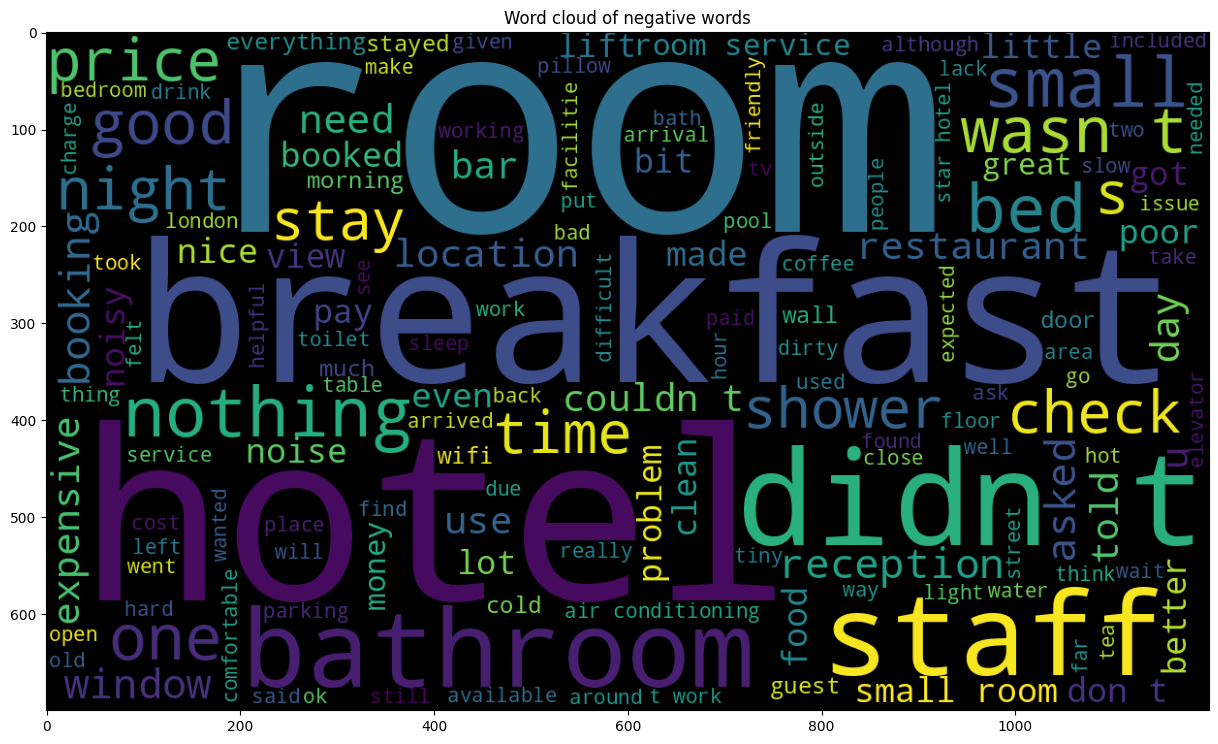

In [25]:
plt.figure(figsize=(15,10))
plt.imshow(n_wc,cmap='Accent_r')
plt.title('Word cloud of negative words')
plt.show()

## Positive Reviews Word Cloud :

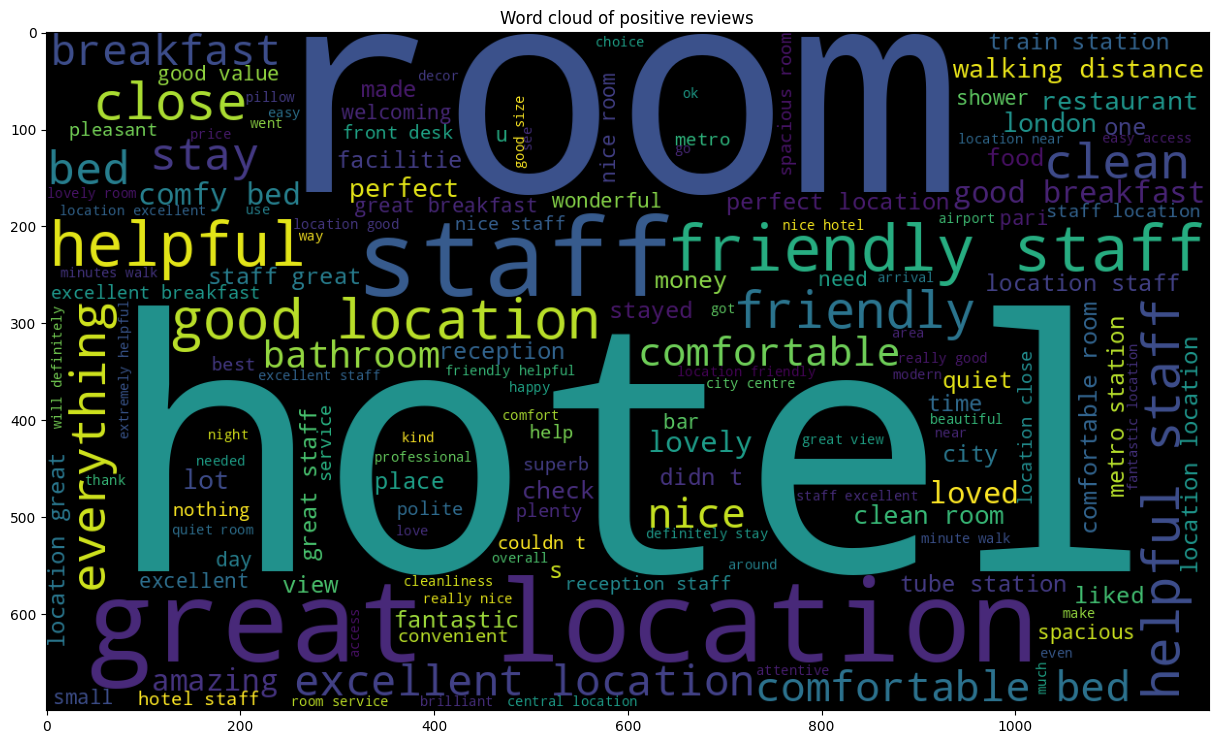

In [26]:
plt.figure(figsize=(15,10))
plt.imshow(p_wc)
plt.title('Word cloud of positive reviews')
plt.show()

## Stemming :

In [27]:
dff_s=dff4.copy()
dff_l=dff4.copy()
from nltk.stem import PorterStemmer

In [28]:
ps=PorterStemmer()
dff_s['review']=dff_s['review'].apply(lambda x:' '.join(ps.stem(word)for word in x.split()))

## Lemmatizetion :

In [29]:
from textblob import Word
dff_l['review']=dff_l['review'].apply(lambda x:' '.join(Word(word).lemmatize()for word in x.split()))

## Converting Categorical Into Numerical :

In [30]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data=[dff4,dff_s,dff_l]
for i in data:
  i['type']=lab.fit_transform(i['type'])

In [31]:
dff4

,review,type
0,it was a little bit of a travel to the center...,0
1,nothing,0
2,staff,0
3,rooftop pool and bar had amazing views over b...,1
4,na,0
...,...,...
867635,the staff were very friendly and were welcomi...,1
867636,nothing,0
867637,late check in,0
867638,everything,1


## Text Vectorizetion :

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf=TfidfVectorizer(max_features=6500)
count=CountVectorizer(ngram_range=(1,3),max_features=1500)
fea_tf=tfidf.fit_transform(dff4['review'])
Y=dff4['type']
fea_stem_tf=tfidf.fit_transform(dff_s['review'])
Y_s=dff_s['type']
fea_lam_tf=tfidf.fit_transform(dff_l['review'])
Y_l=dff_l['type']

In [33]:
fea_coun=count.fit_transform(dff4['review'])
Y_c=dff4['type']
fea_stem_coun=count.fit_transform(dff_s['review'])
fea_lam_coun=count.fit_transform(dff_l['review'])

In [34]:
y=fea_tf.data

## Dividing To Training And Testing :

In [35]:
x_train,x_test,y_train,y_test=optimal_data_selector(predictor=fea_tf,target=Y,combination=30,train_size=0.8,random_state=0,boost=True)

The accuracy is 0.9413235904292103
Computation time = 3.6726311802864076  mints


In [36]:
x_train2,x_test2,y_train2,y_test2=optimal_data_selector(predictor=fea_stem_tf,target=Y_s,combination=30,train_size=0.8,random_state=0,boost=True)

The accuracy is 0.9400730717809229
Computation time = 3.5822532574335733  mints


In [37]:
x_train3,x_test3,y_train3,y_test3=optimal_data_selector(predictor=fea_lam_tf,target=Y_l,combination=30,train_size=0.8,random_state=0,boost=True)

The accuracy is 0.9415713890553686
Computation time = 3.718279234568278  mints


# Train Test Split :

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve

In [39]:
x_train1,x_test1,y_train1,y_test1=train_test_split(fea_lam_tf,Y_l,train_size=0.8,random_state=0)

# LogisticRegression :

In [40]:
log=LogisticRegression()
log.fit(x_train3,y_train3)
log.score(x_test3,y_test3)

0.9415713890553686

In [41]:
y_pre=log.predict(x_test3)

## Performing Metrics :

In [42]:
from sklearn.metrics import classification_report

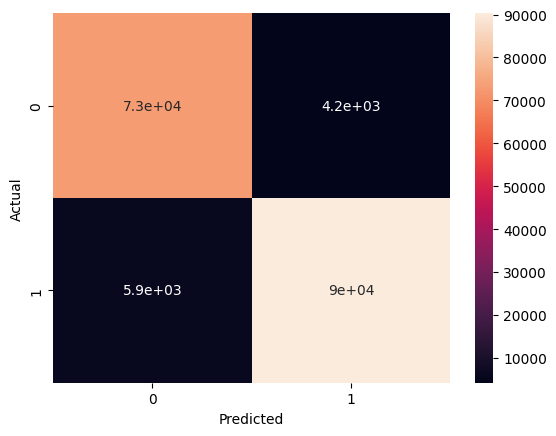

In [43]:
sns.heatmap(confusion_matrix(y_test3,y_pre),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
print(classification_report(y_test3,y_pre))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     77266
           1       0.96      0.94      0.95     96262

    accuracy                           0.94    173528
   macro avg       0.94      0.94      0.94    173528
weighted avg       0.94      0.94      0.94    173528



## LogisticRegression (Traint Test Split) :

In [45]:
log1=LogisticRegression()
log.fit(x_train1,y_train1)
log.score(x_test1,y_test1)

0.9393988290074224

## Cross Validation :

In [46]:
from sklearn.model_selection import cross_val_score
res=cross_val_score(log,x_train3,y_train3,cv=10)
res

array([0.9396502 , 0.93990953, 0.93976459, 0.93969256, 0.93960611,
       0.93944764, 0.9408163 , 0.94153664, 0.93741626, 0.93758914])

In [47]:
print('the average accuracy is= '+str(np.mean(res)))
print('minimum accuracy is = '+str(min(res)))
print('maximun accuracy is = '+str(max(res)))

the average accuracy is= 0.9395428972933247
minimum accuracy is = 0.9374162596706573
maximun accuracy is = 0.9415366440477734


# Naive Bayse :

In [48]:
from sklearn.naive_bayes import MultinomialNB
nb1=MultinomialNB()
nb1.fit(x_train3,y_train3)
nb1.score(x_test3,y_test3)

0.9156447374487114

In [49]:
nb1.score(x_train3,y_train3)

0.9162253353925591

In [50]:
y_pre_nb11=nb1.predict(x_test3)

## Performing Metrics :

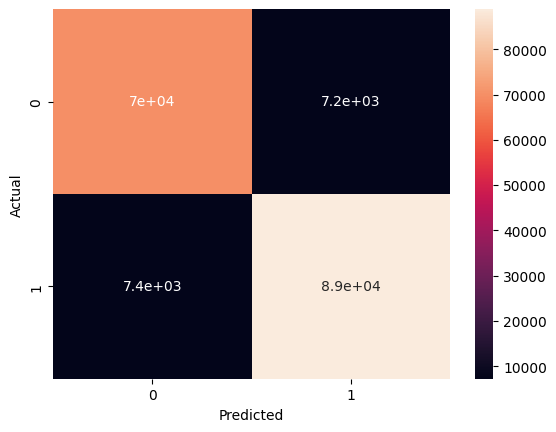

In [51]:
sns.heatmap(confusion_matrix(y_test3,y_pre_nb11),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
print(classification_report(y_test3,y_pre_nb11))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     77266
           1       0.92      0.92      0.92     96262

    accuracy                           0.92    173528
   macro avg       0.91      0.91      0.91    173528
weighted avg       0.92      0.92      0.92    173528



## Taking Subset Of Data :

In [53]:
# As because the data is huge so all the algorethm cant't be applied on this
# We are going to take a very small sample of the data

In [54]:
dff5=dff4.sample(math.ceil(len(dff4)*0.07 ),random_state=1)
dff5.index=range(0,len(dff5))
dff5

,review,type
0,location breakfast rooms,1
1,the cost of breakfast,0
2,great location easy access to many attraction...,1
3,location convinient for aerobus from airport,1
4,nothing,1
...,...,...
60730,location for excel and parking,1
60731,paying 19 euros each for breakfast,0
60732,room on level 3 is too small for 2 guests in ...,0
60733,the room is a bit small,0


In [55]:
dff7=dff_s.sample(math.ceil(len(dff_s)*0.07),random_state=1)

In [56]:
dff5['type'].value_counts()

1    33626
0    27109
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

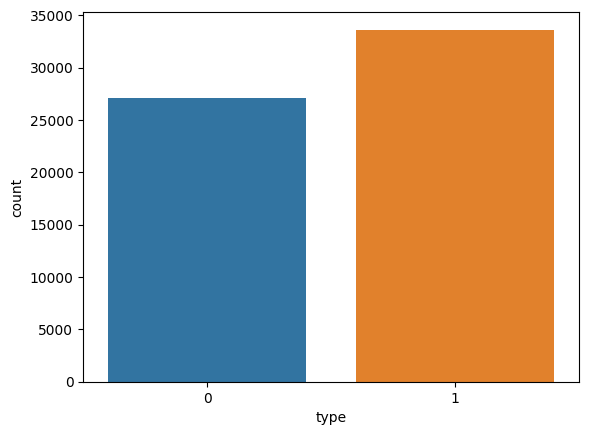

In [57]:
sns.countplot(data=dff5,x=dff5['type'])

In [58]:
tfidf1=TfidfVectorizer(max_features=6500)

In [59]:
f_tf=tfidf1.fit_transform(dff5['review'])
Y3=dff5['type']
f_tf_s=tfidf1.fit_transform(dff7['review'])
x_d=f_tf.toarray()

In [60]:
x_tr,x_ts,y_tr,y_ts=optimal_data_selector(predictor=f_tf,target=Y3,combination=350,random_state=0,train_size=0.8,boost=True)

The accuracy is 0.9452539721741994
Computation time = 3.3921367724736533  mints


## LogisticRegression (Subset Data) :

In [61]:
log2=LogisticRegression()
log2.fit(x_tr,y_tr)
log2.score(x_ts,y_ts)

0.9452539721741994

In [62]:
log2.score(x_tr,y_tr)

0.9437515435910101

In [63]:
y_pre_log2=log2.predict(x_ts)

## Performing Metrics :

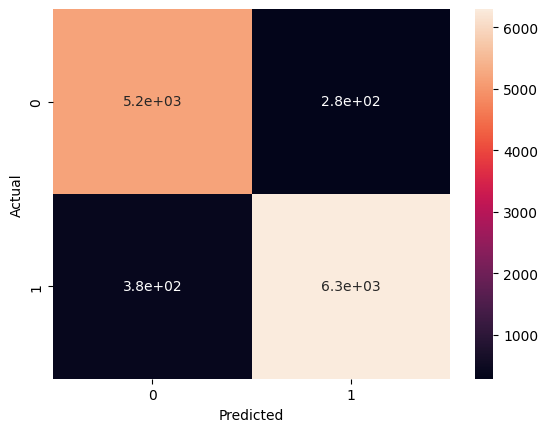

In [64]:
sns.heatmap(confusion_matrix(y_ts,y_pre_log2),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
print(classification_report(y_ts,y_pre_log2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5466
           1       0.96      0.94      0.95      6681

    accuracy                           0.95     12147
   macro avg       0.94      0.95      0.94     12147
weighted avg       0.95      0.95      0.95     12147



## DecisionTreeClassifier (Subset Data) :

In [66]:
from sklearn.tree import DecisionTreeClassifier
dis=DecisionTreeClassifier(random_state=2)
dis.fit(x_tr,y_tr)
dis.score(x_ts,y_ts)

0.8900139952251584

## RandomForestClassifier (Subset Data) :

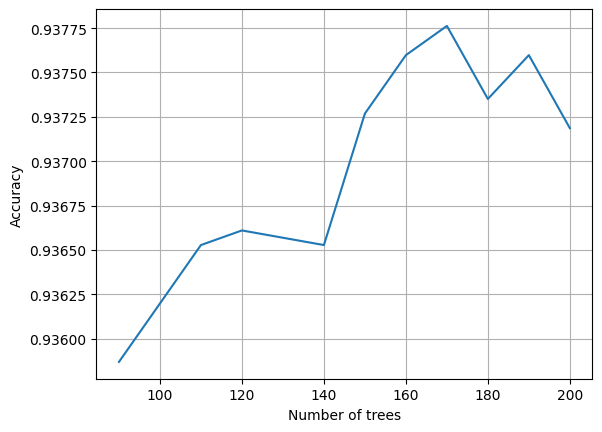

In [67]:
from sklearn.ensemble import RandomForestClassifier
a1=[]
list1=[90,110,120,140,150,160,170,180,190,200]
for i in list1:
  ran22=RandomForestClassifier(n_estimators=i,random_state=0)
  ran22.fit(x_tr,y_tr)
  a1.append(ran22.score(x_ts,y_ts))
plt.plot(list1,a1)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [68]:
ran=RandomForestClassifier(n_estimators=170,random_state=0)
ran.fit(x_tr,y_tr)
ran.score(x_ts,y_ts)

0.9377624104717214

In [69]:
y_pre_ran=ran.predict(x_ts)

## Performing Metrics :

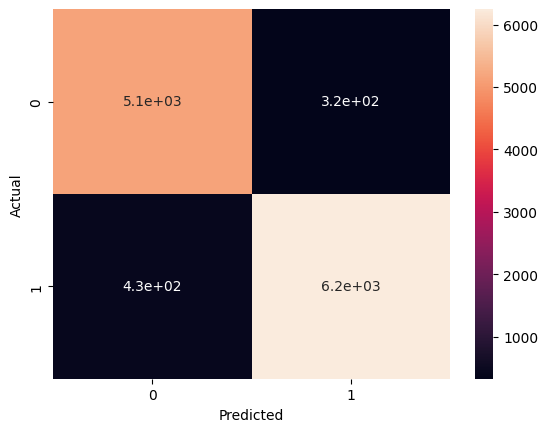

In [70]:
sns.heatmap(confusion_matrix(y_ts,y_pre_ran),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
print(classification_report(y_ts,y_pre_ran))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5466
           1       0.95      0.94      0.94      6681

    accuracy                           0.94     12147
   macro avg       0.94      0.94      0.94     12147
weighted avg       0.94      0.94      0.94     12147



## KNeighborsClassifier_KNN (Subset Data) :

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
for k in range(3,10,2):
  knn1=KNeighborsClassifier(n_neighbors=k)
  knn1.fit(x_tr,y_tr)
  print('for ',k,' neighbors accuracy is = '+str(knn1.score(x_ts,y_ts)))

for  3  neighbors accuracy is = 0.7486622211245575
for  5  neighbors accuracy is = 0.7504733679097719
for  7  neighbors accuracy is = 0.7221536181773277
for  9  neighbors accuracy is = 0.7075821190417387


In [74]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr,y_tr)
knn.score(x_ts,y_ts)

0.7486622211245575

In [75]:
knn.score(x_tr,y_tr)

0.9639211327899893

In [76]:
y_pre_knn=knn.predict(x_ts)

## Performing Metrics :

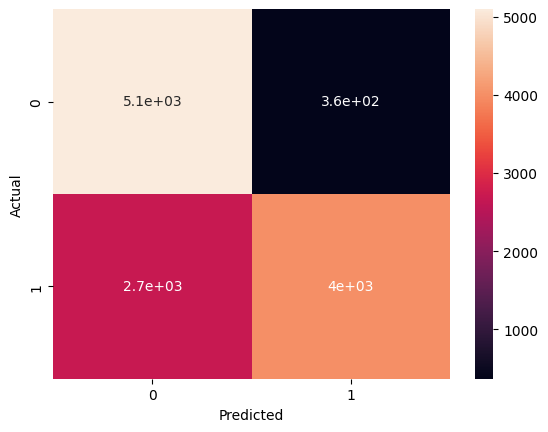

In [77]:
sns.heatmap(confusion_matrix(y_ts,y_pre_knn),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
print(classification_report(y_ts,y_pre_knn))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77      5466
           1       0.92      0.60      0.72      6681

    accuracy                           0.75     12147
   macro avg       0.79      0.77      0.75     12147
weighted avg       0.80      0.75      0.74     12147



## SVM (Subset Data) :


for kernel =  rbf  accuracy is = 0.9542273812463983
for kernel =  poly  accuracy is = 0.9433605005351116
for kernel =  linear  accuracy is = 0.9455009467358195
for kernel =  sigmoid  accuracy is = 0.9247550835597267


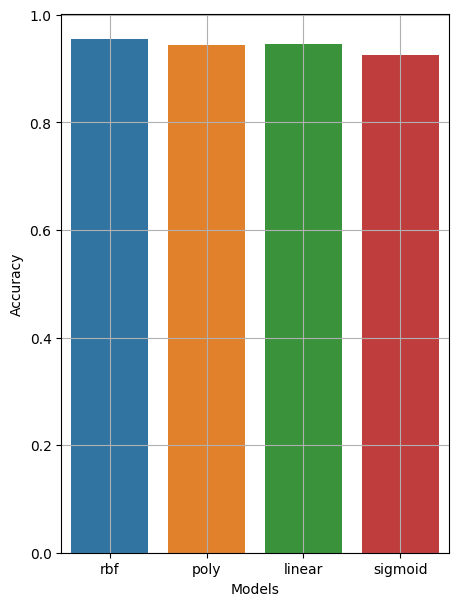

In [79]:
from sklearn.svm import SVC
a0=[]
svms=['rbf','poly','linear','sigmoid']
for sv in svms:
  svm0=SVC(kernel=sv)
  svm0.fit(x_tr,y_tr)
  a0.append(svm0.score(x_ts,y_ts))
  print('for kernel = ',sv,' accuracy is = '+str(svm0.score(x_ts,y_ts)))
plt.figure(figsize=(5,7))
sns.barplot(x=svms,y=a0)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [80]:
svm=SVC()
svm.fit(x_tr,y_tr)
svm.score(x_ts,y_ts)

0.9542273812463983

In [81]:
svm.score(x_tr,y_tr)

0.9733473285584918

## Performing Metrics :

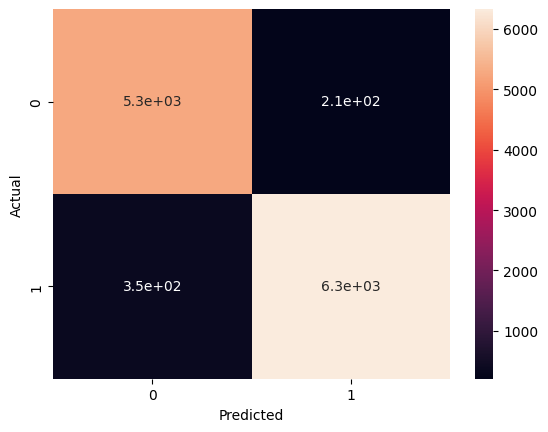

In [82]:
y_pre_svm=svm.predict(x_ts)
sns.heatmap(confusion_matrix(y_ts,y_pre_svm),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
print(classification_report(y_ts,y_pre_svm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5466
           1       0.97      0.95      0.96      6681

    accuracy                           0.95     12147
   macro avg       0.95      0.95      0.95     12147
weighted avg       0.95      0.95      0.95     12147



## Naive Bayse (Subset Data) :

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_tr,y_tr)
nb.score(x_ts,y_ts)

0.9222853379435252

In [85]:
nb.score(x_tr,y_tr)

0.9216679015394748

In [86]:
y_pre_nb=nb.predict(x_ts)

## Performing Metrics :

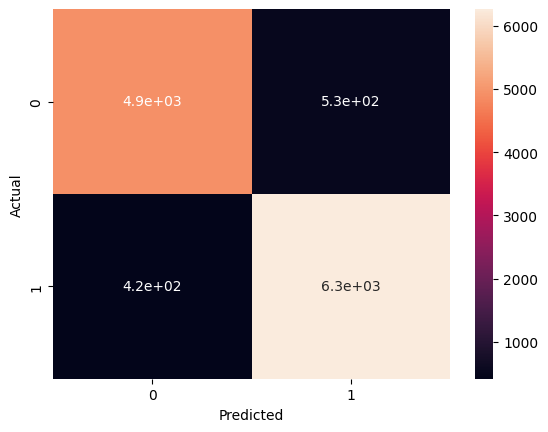

In [87]:
sns.heatmap(confusion_matrix(y_ts,y_pre_nb),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
y_pre_nb=nb.predict(x_ts)
print(classification_report(y_ts,y_pre_nb))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5466
           1       0.92      0.94      0.93      6681

    accuracy                           0.92     12147
   macro avg       0.92      0.92      0.92     12147
weighted avg       0.92      0.92      0.92     12147



## BaggingClassifier (Subset Data) :

In [89]:
from sklearn.ensemble import BaggingClassifier

In [90]:
mod=[log2,nb]
n_es=[10,20,30,40,50,60]
fea=[0.6,0.7,0.8,0.9,1.0]
comb=[]
accu=[]
for m in mod:
  for n in n_es:
    for f in fea:
      bag1=BaggingClassifier(estimator=m,n_estimators=n,max_samples=f,random_state=0)
      bag1.fit(x_tr,y_tr)
      comb.append(['mod=',m,'n_es=',n,'fea=',f])
      accu.append(bag1.score(x_ts,y_ts))
print('best combination is = '+str(comb[accu.index(max(accu))]))
print('with the accuracy = '+str(max(accu)))

best combination is = ['mod=', LogisticRegression(), 'n_es=', 20, 'fea=', 0.9]
with the accuracy = 0.9450893224664526


In [91]:
bag=BaggingClassifier(estimator=log2,n_estimators=20,max_samples=0.9,random_state=0)
bag.fit(x_tr,y_tr)
bag.score(x_ts,y_ts)

0.9450893224664526

In [92]:
bag.score(x_tr,y_tr)

0.942310858648226

In [93]:
y_pre_bag=bag.predict(x_ts)

## Performing Metrics :

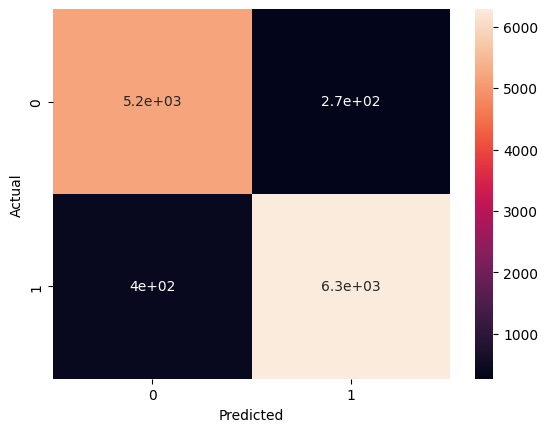

In [94]:
sns.heatmap(confusion_matrix(y_ts,y_pre_bag),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [95]:
print(classification_report(y_ts,y_pre_bag))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5466
           1       0.96      0.94      0.95      6681

    accuracy                           0.95     12147
   macro avg       0.94      0.95      0.94     12147
weighted avg       0.95      0.95      0.95     12147



## Boosting (Subset Data) :

In [96]:
!pip install xgboost

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
ada=AdaBoostClassifier(estimator=dis)
gra=GradientBoostingClassifier()
xg=XGBClassifier()
boost=[ada,gra,xg]
for i in boost:
  i.fit(x_tr,y_tr)
  print('In {}'.format(i),'Accuracy is = '+str(i.score(x_ts,y_ts)))

In AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=2)) Accuracy is = 0.8866386762163497
In GradientBoostingClassifier() Accuracy is = 0.8924014159874866
In XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) Accuracy is = 0.9304354984769903


In [99]:
xg.score(x_tr,y_tr)

0.9429077138388079

In [100]:
y_pre_xg=xg.predict(x_ts)

## Performing Metrics :

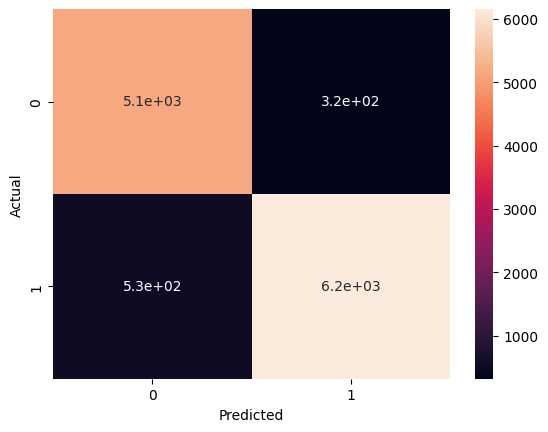

In [101]:
sns.heatmap(confusion_matrix(y_ts,y_pre_xg),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [102]:
print(classification_report(y_ts,y_pre_xg))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5466
           1       0.95      0.92      0.94      6681

    accuracy                           0.93     12147
   macro avg       0.93      0.93      0.93     12147
weighted avg       0.93      0.93      0.93     12147



## VotingClassifier (Subset Data) :

In [103]:
from sklearn.ensemble import VotingClassifier

In [104]:
es=[('log',log2),('svm',svm)]
vot=VotingClassifier(estimators=es)
vot.fit(x_tr,y_tr)
vot.score(x_ts,y_ts)

0.9509343870914629

In [105]:
vot.score(x_tr,y_tr)

0.9560591092450811

In [106]:
y_pre_vot=vot.predict(x_ts)

## Performing Metrics :

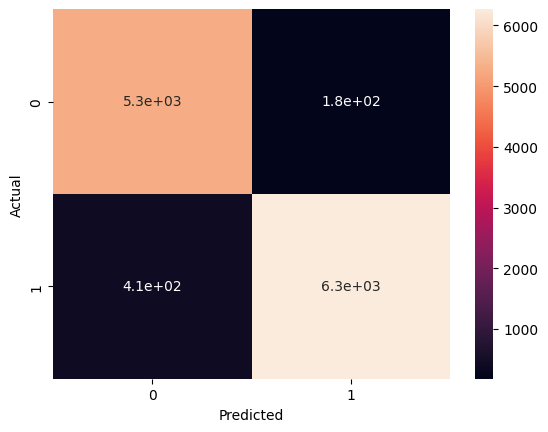

In [107]:
sns.heatmap(confusion_matrix(y_ts,y_pre_vot),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [108]:
print(classification_report(y_ts,y_pre_vot))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5466
           1       0.97      0.94      0.95      6681

    accuracy                           0.95     12147
   macro avg       0.95      0.95      0.95     12147
weighted avg       0.95      0.95      0.95     12147

